# Correlation and Linear regression in R. Example
**Task.** COVID-19 pandemia flows in a different way in different countries. Find out how strong is cumulative infection cases relate to the lethal outcomes in three countries: Russian Federation (RU), People's Republic of China (CN) and United States (US). Can linear regression be built for each of these countries? Plot the relation. Use the COVID-19 WHO site as a [data source](https://covid19.who.int/WHO-COVID-19-global-data.csv)

**Note:** We will assess the direction and strength of the correlation coefficients as described in this [article](https://www.ajol.info/index.php/mmj/article/view/81576)

Sign of cor.coeff|Correlation direction
-|-
Positive|Direct relation
Negative|Inverse relation

Abs. value of cor. coeff.|Correlation strength
-|-
0.90-1.00|Very high
0.70-0.90|High
0.50-0.70|Moderate
0.30-0.50|Low
$\leq$0.30|Negligible

**Get data in R**

In [1]:
Data = read.csv(file = "https://covid19.who.int/WHO-COVID-19-global-data.csv", header = TRUE, strip.white = TRUE)
str(Data)

'data.frame':	78255 obs. of  8 variables:
 $ Date_reported    : Factor w/ 333 levels "2020-01-03","2020-01-04",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Country_code     : Factor w/ 234 levels "","AD","AE","AF",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Country          : Factor w/ 235 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ WHO_region       : Factor w/ 7 levels "AFRO","AMRO",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ New_cases        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Cumulative_cases : int  0 0 0 0 0 0 0 0 0 0 ...
 $ New_deaths       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Cumulative_deaths: int  0 0 0 0 0 0 0 0 0 0 ...


In [2]:
# Get data for the countries of interest
Data.RU = na.omit(Data[Data$Country_code == "RU", ])
Data.CN = na.omit(Data[Data$Country_code == "CN", ])
Data.US = na.omit(Data[Data$Country_code == "US", ])

In [3]:
# Delete the source data, because we won't need it
rm(Data)

### 1. Check if data follows the normal distribution
#### Russian Federation

In [4]:
shapiro.test(Data.RU$Cumulative_cases)
shapiro.test(Data.RU$Cumulative_deaths)


	Shapiro-Wilk normality test

data:  Data.RU$Cumulative_cases
W = 0.88005, p-value = 1.86e-15



	Shapiro-Wilk normality test

data:  Data.RU$Cumulative_deaths
W = 0.85971, p-value < 2.2e-16


Both of the variables doesn't follow normal distribution. We have to use non-parametric methods for RU data

#### People's Republic of China

In [5]:
shapiro.test(Data.CN$Cumulative_cases)
shapiro.test(Data.CN$Cumulative_deaths)


	Shapiro-Wilk normality test

data:  Data.CN$Cumulative_cases
W = 0.54579, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  Data.CN$Cumulative_deaths
W = 0.63979, p-value < 2.2e-16


Both of the variables doesn't follow normal distribution. We have to use non-parametric methods for CN data

#### United States of America

In [6]:
shapiro.test(Data.US$Cumulative_cases)
shapiro.test(Data.US$Cumulative_deaths)


	Shapiro-Wilk normality test

data:  Data.US$Cumulative_cases
W = 0.87089, p-value = 4.581e-16



	Shapiro-Wilk normality test

data:  Data.US$Cumulative_deaths
W = 0.89291, p-value = 1.521e-14


Both of the variables doesn't follow normal distribution. We have to use non-parametric methods for CN data

**The samples for each country doesn't follow normal distribution, so we'll use the Spearman rank correlation test method.**

### 2. Correlation analysis
At the correlation analysis stage we'll test the correlation test hypotheses and calculate the relevant correlation coefficients.

#### Correlation test hypotheses:

**Null hypothesis H0:** Cumulative death outcomes and cumulative amount of infections aren't related to each other

**Alternative hypothesis H1:** Cumulative death outcomes are related to the cumulative amount of infections

#### Russian Federation

In [7]:
cor.test(Data.RU$Cumulative_cases, Data.RU$Cumulative_deaths, method = "spearman", exact = FALSE)


	Spearman's rank correlation rho

data:  Data.RU$Cumulative_cases and Data.RU$Cumulative_deaths
S = 43290, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9929658 


For Russian Federation `p-value` is much less than significance level of 0.05, which means we have to reject the null hypothesis and accept alternative hypothesis.

**In Russia cumulative death outcomes of COVID-19 are related to the cumulative amount of infections.**

Spearman's correlation coefficient `rho` = 0.99. The positive sign indicates direct relation between the deaths and infections. With increase of infection cases amount of deaths also increases.
Absolute value of `rho` is greater than 0.9 which means very high correlation strength between the amount of infections and the amount of total deaths.

#### People's Republic of China

In [8]:
cor.test(Data.CN$Cumulative_cases, Data.CN$Cumulative_deaths, method = "spearman", exact = FALSE)


	Spearman's rank correlation rho

data:  Data.CN$Cumulative_cases and Data.CN$Cumulative_deaths
S = 10325, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9983223 


For People's Republic of China `p-value` is much less than significance level of 0.05, which means we have to reject the null hypothesis and accept alternative hypothesis.

**In China cumulative death outcomes of COVID-19 are related to the cumulative amount of infections.**

Spearman's correlation coefficient `rho` = 0.99. The positive sign indicates direct relation between the deaths and infections. With increase of infection cases amount of deaths also increases.
Absolute value of `rho` is greater than 0.9 which means very high correlation strength between the amount of infections and the amount of total deaths.

#### United States

In [9]:
cor.test(Data.US$Cumulative_cases, Data.US$Cumulative_deaths, method = "spearman", exact = FALSE)


	Spearman's rank correlation rho

data:  Data.US$Cumulative_cases and Data.US$Cumulative_deaths
S = 17554, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9971477 


For United States `p-value` is much less than significance level of 0.05, which means we have to reject the null hypothesis and accept alternative hypothesis.

**In USA cumulative death outcomes of COVID-19 are related to the cumulative amount of infections.**

For People's Republic of China `p-value` is much less than significance level of 0.05, which means we have to reject the null hypothesis and accept alternative hypothesis.

Spearman's correlation coefficient `rho` = 0.99. The positive sign indicates direct relation between the deaths and infections. With increase of infection cases amount of deaths also increases.
Absolute value of `rho` is greater than 0.9 which means very high correlation strength between the amount of infections and the amount of total deaths.

**One can see, that in all three countries cumulative death outcomes has a strong direct relation to the cumulative infection cases. Which is in accordance with common sense and biomedical knowledge.**

### 3. Determine the regression line equation
#### 3.1. Plot the scatterplots for relation Cumulative_deaths of Cumulative_cases

#### Russian Federation

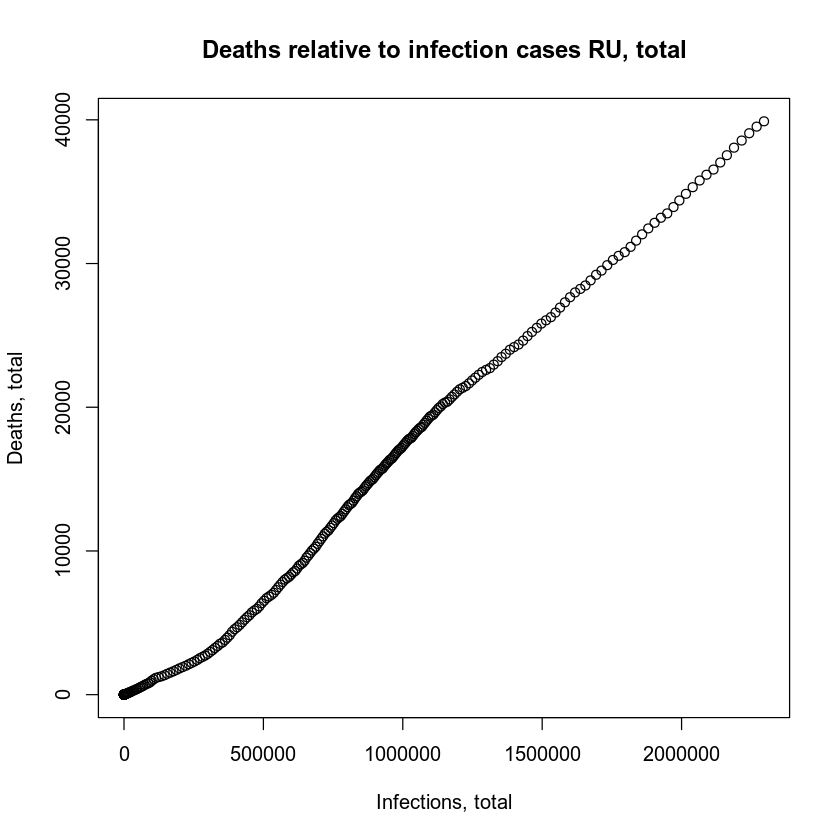

In [10]:
plot(Cumulative_deaths ~ Cumulative_cases, 
     data = Data.RU, 
     main = "Deaths relative to infection cases RU, total", 
     xlab = "Infections, total", 
     ylab = "Deaths, total")

#### People's Republic of China

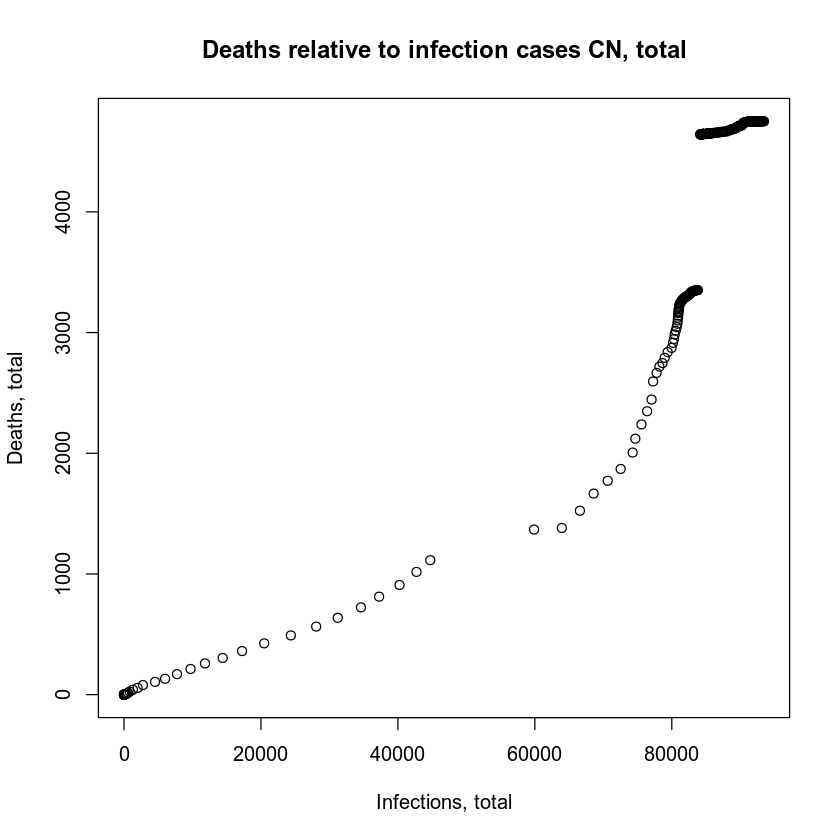

In [11]:
plot(Cumulative_deaths ~ Cumulative_cases, 
     data = Data.CN, 
     main = "Deaths relative to infection cases CN, total", 
     xlab = "Infections, total", 
     ylab = "Deaths, total")

#### United States

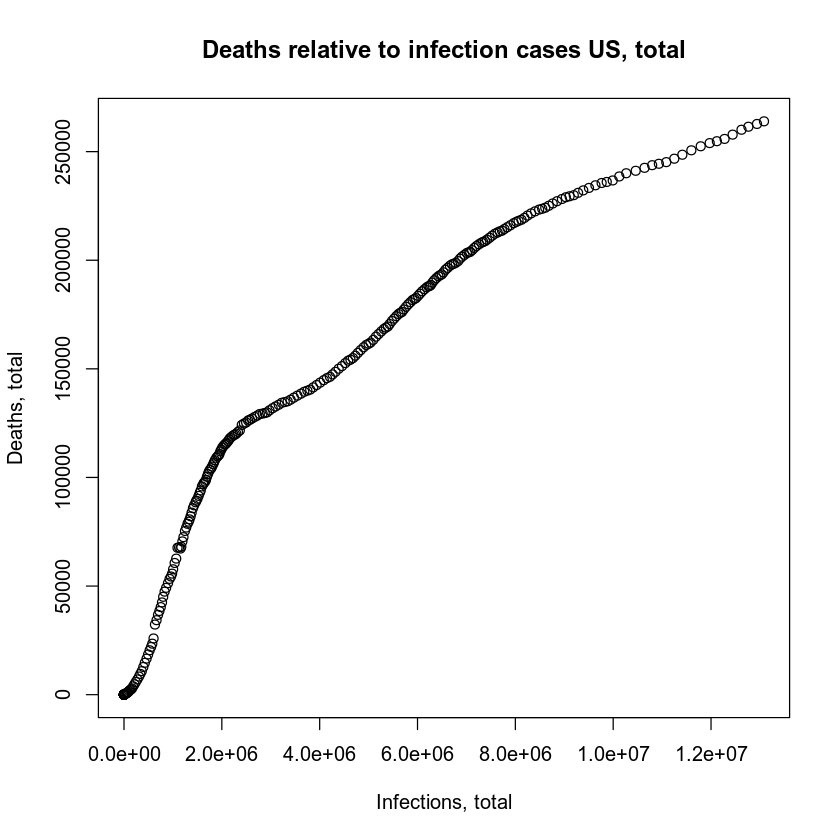

In [12]:
plot(Cumulative_deaths ~ Cumulative_cases, 
     data = Data.US, 
     main = "Deaths relative to infection cases US, total", 
     xlab = "Infections, total", 
     ylab = "Deaths, total")

As one can see, the only graph that resembles straight line is for the Russian Federation, which means we will be able to make a linear regression for this country. Unfortunately data from US and China doesn't allow us to make a linear regression even if the correlation coefficients for both countries are very high.

#### 3.2. Linear regression for RU data

To make the linear regression model we have to use `lm` function. It expects two arguments: `formula` and the `data`. The `formula` argument accepts expressions in the form `y ~ x` where `y` is a dependent variable, `x` is an independent variable. Argument `data` expects the data frame or matrix and serves as a source data for the `formula` argument, hence `x` and `y` must be substituted with the used names in the `data`.

In our example `x` becomes `Cumulative_cases` and `y` becomes `Cumulative_deaths`.

In [13]:
Model.RU = lm(Cumulative_deaths ~ Cumulative_cases, data = Data.RU)
summary(Model.RU)


Call:
lm(formula = Cumulative_deaths ~ Cumulative_cases, data = Data.RU)

Residuals:
    Min      1Q  Median      3Q     Max 
-1905.8  -330.5   288.0   656.3   835.6 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -6.564e+02  6.401e+01  -10.26   <2e-16 ***
Cumulative_cases  1.753e-02  7.177e-05  244.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 822.1 on 331 degrees of freedom
Multiple R-squared:  0.9945,	Adjusted R-squared:  0.9945 
F-statistic: 5.965e+04 on 1 and 331 DF,  p-value: < 2.2e-16


Linear regression model built for RU data has adjusted $R^2$ value of 0.99. This points to the fact of nearly ideal model for the RU case. Model parameters are represented by intercept value of -654.8 and slope value of 0.01753.

Now let's plot the graph for RU data with our linear model.

To show the linear regression coefficients we'll use `coef` function.

ERROR: Error in paste("Deaths =", round(coef(Model.RU)[2], digits = 6), "* Infections", : object 'Model.RU.Summary' not found


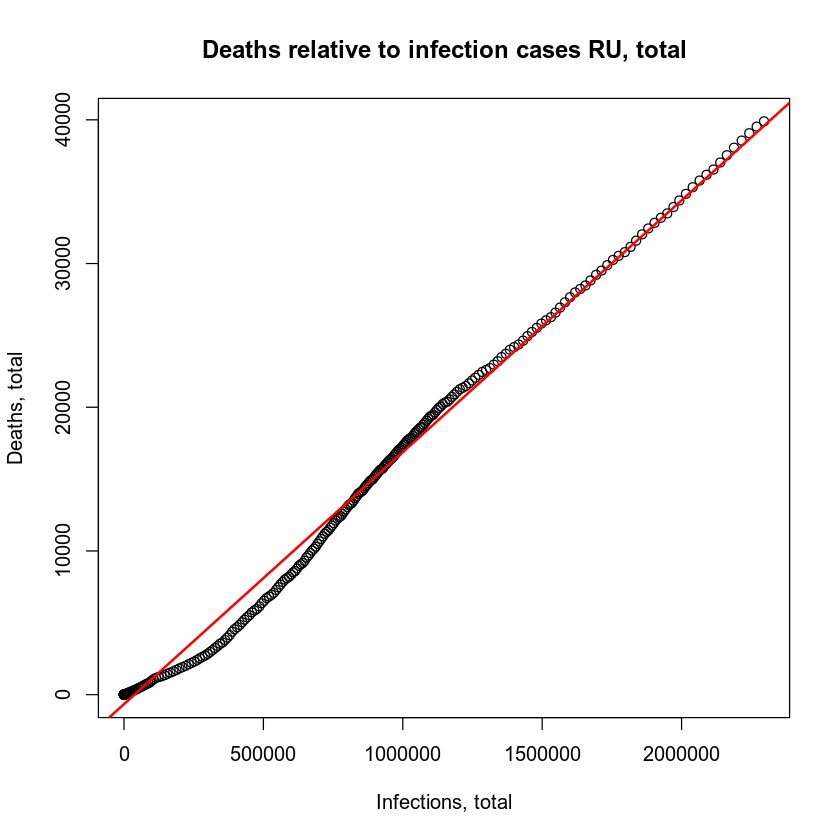

In [14]:
plot(Cumulative_deaths ~ Cumulative_cases, data = Data.RU, main = "Deaths relative to infection cases RU, total", xlab = "Infections, total", ylab = "Deaths, total")
abline(coef = Model.RU$coefficients, lty = 1, lwd = 2, col = "red")
# Present linear regression equation
paste("Deaths =", round(coef(Model.RU)[2], digits = 6), "* Infections", round(coef(Model.RU)[1], digits = 6), 
      ", Adj.R-sq", round(Model.RU.Summary$adj.r.squared, digits = 4))

### Conclusion:
In all countries considered (RU, CN, US) direct very high strength relation between the total infections cases and total amount of deaths has been found. 

The RU data is the only one following the linear regression model and can be described as ${Deaths} = 0.017529 \cdot {Infections} -656.429814$, $Adj.R^2 = 0.9945$